In [100]:
import pandas as pd

In [101]:
weather  = pd.read_csv(r"C:\Users\deept\Downloads\3297439.csv", index_col = "DATE")

In [102]:
print(weather)

                STATION                                  NAME   AWND  PGTM  \
DATE                                                                         
2023-01-01  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   6.93   NaN   
2023-01-02  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US  10.29   NaN   
2023-01-03  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   7.61   NaN   
2023-01-04  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US  17.00   NaN   
2023-01-05  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US  14.76   NaN   
...                 ...                                   ...    ...   ...   
2023-03-30  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   7.38   NaN   
2023-03-31  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   7.38   NaN   
2023-04-01  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   7.61   NaN   
2023-04-02  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US  17.00   NaN   
2023-04-03  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US  2

In [103]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
AWND       0.000000
PGTM       0.989247
PRCP       0.010753
TAVG       1.000000
TMAX       0.000000
TMIN       0.000000
WDF2       0.000000
WDF5       0.000000
WSF2       0.000000
WSF5       0.000000
WT01       0.537634
WT02       0.967742
WT03       0.903226
WT05       0.989247
WT08       0.935484
dtype: float64

In [104]:
core_weather = weather[["PRCP", "TMAX", "TMIN"]].copy()

In [105]:
core_weather.columns = ["precip", "temp_max", "temp_min"]

In [106]:
core_weather

,precip,temp_max,temp_min
DATE,,,
2023-01-01,0.00,62,46
2023-01-02,0.41,52,45
2023-01-03,0.00,55,45
2023-01-04,1.40,59,48
2023-01-05,0.32,58,51
...,...,...,...
2023-03-30,0.00,57,41
2023-03-31,0.00,59,42
2023-04-01,0.00,61,41


In [107]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

precip      0.010753
temp_max    0.000000
temp_min    0.000000
dtype: float64

In [108]:
core_weather[pd.isnull(core_weather["precip"])]
core_weather["precip"].fillna("0.00")

DATE
2023-01-01     0.0
2023-01-02    0.41
2023-01-03     0.0
2023-01-04     1.4
2023-01-05    0.32
              ... 
2023-03-30     0.0
2023-03-31     0.0
2023-04-01     0.0
2023-04-02    0.06
2023-04-03     0.0
Name: precip, Length: 93, dtype: object

In [109]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,


In [110]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,


In [111]:
core_weather = core_weather.fillna(method="ffill")

In [112]:
core_weather

,precip,temp_max,temp_min
DATE,,,
2023-01-01,0.00,62,46
2023-01-02,0.41,52,45
2023-01-03,0.00,55,45
2023-01-04,1.40,59,48
2023-01-05,0.32,58,51
...,...,...,...
2023-03-30,0.00,57,41
2023-03-31,0.00,59,42
2023-04-01,0.00,61,41


In [113]:
core_weather.dtypes

precip      float64
temp_max      int64
temp_min      int64
dtype: object

In [114]:
core_weather.index

Index(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
       '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10',
       '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15',
       '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
       '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
       '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
       '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
       '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
       '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19',
       '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
       '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01',
       '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',

In [115]:
core_weather.index = pd.to_datetime(core_weather.index)

In [116]:
core_weather.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      

<AxesSubplot:xlabel='DATE'>

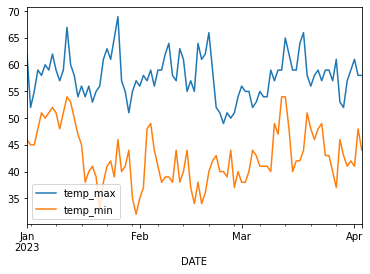

In [117]:
core_weather[["temp_max", "temp_min"]].plot()

In [119]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [120]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
2023-01-01,0.00,62,46,52.0
2023-01-02,0.41,52,45,55.0
2023-01-03,0.00,55,45,59.0
2023-01-04,1.40,59,48,58.0
2023-01-05,0.32,58,51,60.0
...,...,...,...,...
2023-03-30,0.00,57,41,59.0
2023-03-31,0.00,59,42,61.0
2023-04-01,0.00,61,41,58.0


In [121]:
core_weather 

,precip,temp_max,temp_min,target
DATE,,,,
2023-01-01,0.00,62,46,52.0
2023-01-02,0.41,52,45,55.0
2023-01-03,0.00,55,45,59.0
2023-01-04,1.40,59,48,58.0
2023-01-05,0.32,58,51,60.0
...,...,...,...,...
2023-03-30,0.00,57,41,59.0
2023-03-31,0.00,59,42,61.0
2023-04-01,0.00,61,41,58.0


In [122]:
core_weather = core_weather.iloc[:-1,:].copy()

In [123]:
core_weather


,precip,temp_max,temp_min,target
DATE,,,,
2023-01-01,0.00,62,46,52.0
2023-01-02,0.41,52,45,55.0
2023-01-03,0.00,55,45,59.0
2023-01-04,1.40,59,48,58.0
2023-01-05,0.32,58,51,60.0
...,...,...,...,...
2023-03-29,0.64,52,43,57.0
2023-03-30,0.00,57,41,59.0
2023-03-31,0.00,59,42,61.0


In [124]:
from sklearn.linear_model import Ridge

In [125]:
reg = Ridge(alpha=.1)

In [126]:
predictors=["precip", "temp_max", "temp_min"]

In [127]:
train = core_weather.loc[:"2023-02-26"]

In [128]:
test = core_weather.loc["2023-02-27":]

In [129]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [130]:
predictions = reg.predict(test[predictors])

In [131]:
train

,precip,temp_max,temp_min,target
DATE,,,,
2023-01-01,0.00,62,46,52.0
2023-01-02,0.41,52,45,55.0
2023-01-03,0.00,55,45,59.0
2023-01-04,1.40,59,48,58.0
2023-01-05,0.32,58,51,60.0
2023-01-06,0.00,60,50,59.0
2023-01-07,0.12,59,51,62.0
2023-01-08,0.79,62,52,59.0
2023-01-09,1.19,59,51,57.0


In [132]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2023-02-27,0.37,51,37,54.0
2023-02-28,0.45,54,40,56.0
2023-03-01,0.00,56,38,55.0
2023-03-02,0.00,55,38,55.0
2023-03-03,0.00,55,40,52.0
2023-03-04,0.12,52,44,53.0
2023-03-05,0.18,53,43,55.0
2023-03-06,0.16,55,41,54.0
2023-03-07,0.00,54,41,54.0


In [133]:
 from sklearn.metrics import mean_absolute_error

In [143]:
error = mean_absolute_error(test["target"], predictions)

In [139]:
combined = pd.concat([test["target"], pd.Series(predictions,index = test.index)], axis = 1)
combined.columns = ["actual", "predictions"]

In [140]:
combined

,actual,predictions
DATE,,
2023-02-27,54.0,54.075531
2023-02-28,56.0,55.542591
2023-03-01,55.0,57.064922
2023-03-02,55.0,56.491642
2023-03-03,52.0,56.350990
2023-03-04,53.0,54.287149
2023-03-05,55.0,54.899405
2023-03-06,54.0,56.197066
2023-03-07,54.0,55.707385


<AxesSubplot:xlabel='DATE'>

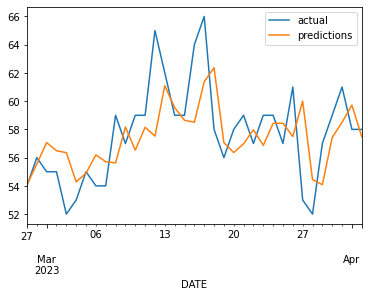

In [141]:
combined.plot()

In [142]:
reg.coef_

array([-0.52248768,  0.57327931, -0.07032611])

In [144]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2023-02-26"]
    test = core_weather.loc["2023-02-27":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions,index = test.index)], axis = 1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [145]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [146]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
2023-01-01,0.00,62,46,52.0,NaN
2023-01-02,0.41,52,45,55.0,NaN
2023-01-03,0.00,55,45,59.0,NaN
2023-01-04,1.40,59,48,58.0,NaN
2023-01-05,0.32,58,51,60.0,NaN
...,...,...,...,...,...
2023-03-29,0.64,52,43,57.0,57.533333
2023-03-30,0.00,57,41,59.0,57.633333
2023-03-31,0.00,59,42,61.0,57.733333


In [147]:
core_weather["month_day_max"] = core_weather["month_max"]/core_weather["temp_max"]

In [148]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max
DATE,,,,,,
2023-01-01,0.00,62,46,52.0,NaN,NaN
2023-01-02,0.41,52,45,55.0,NaN,NaN
2023-01-03,0.00,55,45,59.0,NaN,NaN
2023-01-04,1.40,59,48,58.0,NaN,NaN
2023-01-05,0.32,58,51,60.0,NaN,NaN
...,...,...,...,...,...,...
2023-03-29,0.64,52,43,57.0,57.533333,1.106410
2023-03-30,0.00,57,41,59.0,57.633333,1.011111
2023-03-31,0.00,59,42,61.0,57.733333,0.978531
